A short example showing how to load a Thai font (from Internet) and use it in plotting in Google Colab

In [1]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# conda install -c anaconda seaborn
import seaborn as sns
sns.set()  # Plot using the seaborn style

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Pandas 2.1.4
NumPy 1.26.4
IPython 7.34.0
Matplotlib 3.7.1
Seaborn 0.13.1


Create a dummy DataFrame with Thai font

In [2]:
df = pd.DataFrame( {'อายุ':[10, 30, 50, 20],
                    'ส่วนสูง':[100, 150, 145, 155]} )
df

,อายุ,ส่วนสูง
0,10,100
1,30,150
2,50,145
3,20,155


Try displaying the graph (with Thai font) without any additional font setting:

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

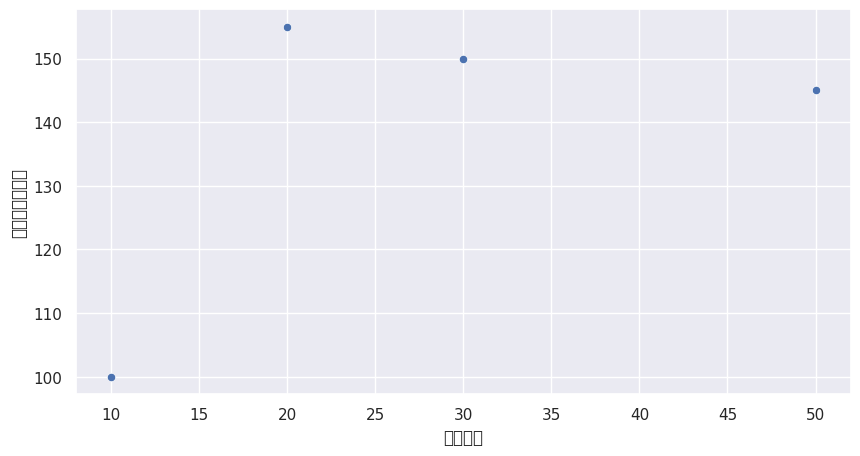

In [3]:
# Matplotlib+Seaborn: Draw the graph with Thai font

# (Optional) Figure setting
plt.figure(figsize=(10,5))

# Plot
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

# Optional for Jupyter
plt.show()

In [4]:
# Check the font that matplotlib currently uses
mpl.rcParams['font.family']

['sans-serif']

# Set TH Sarabun New (Thai font) to Colab

In [5]:
# Download the font from Internet
# Credit: https://stackoverflow.com/a/51844978

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2024-09-18 15:50:46--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-09-18 15:50:46--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.04s   

2024-09-18 15:50:46 (2.63 MB/s) - ‘t

In [6]:
# Add the downloaded font to the font list of matplotlib
# Credit: https://stackoverflow.com/a/51844978

from matplotlib import font_manager

font_dir = 'thsarabunnew-webfont.ttf'  # Specify where the font file is stored
font_manager.fontManager.addfont(font_dir)

Find the "font family" regarding the downloaded font. Be careful that <u>this is a name recognized by the font manager</u>, which is (usually) different from a filename.

In [7]:
!pip install fontTools

In [8]:
from fontTools import ttLib

font = ttLib.TTFont(font_dir)
font_familyname = font['name'].getDebugName(1)
font_fullname = font['name'].getDebugName(4)

print( f"family name: {font_familyname} , full name: {font_fullname}"  )

family name: TH Sarabun New , full name: TH Sarabun New Regular


In [9]:
# Set the font to matplotlib
# More font parameters in https://matplotlib.org/stable/api/font_manager_api.html
params = {'font.family':font_familyname,
          'legend.fontsize':'x-large',
          'axes.labelsize':'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

# Update the default rc (runtime configuration) settings
plt.rcParams.update(params)

In [10]:
# Check the font that matplotlib currently uses
mpl.rcParams['font.family']

['TH Sarabun New']

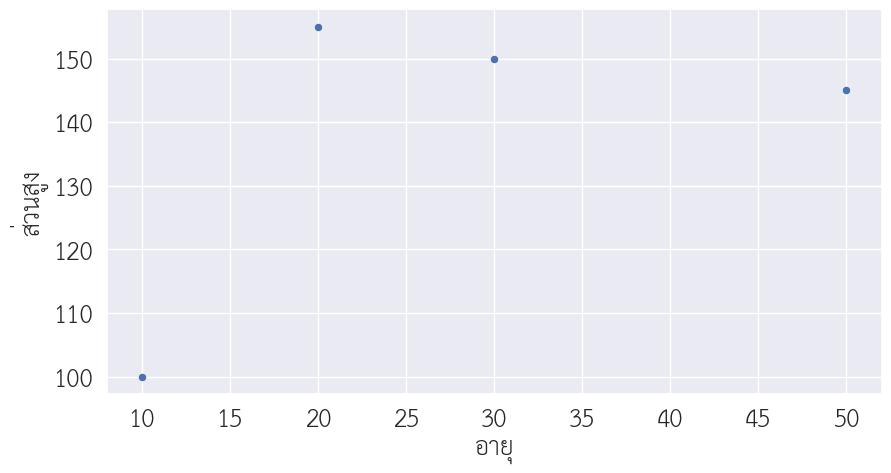

In [11]:
# Matplotlib+Seaborn: Draw the graph (with Thai font) again

# (Optional) Figure setting
plt.figure(figsize=(10,5))

# Plot
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

# Optional for Jupyter
plt.show()

<Axes: xlabel='อายุ', ylabel='ส่วนสูง'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3626 (\N{THAI CHARACTER SO SUA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3656 (\N{THAI CHARACTER MAI EK}) missing from current font.
  fu

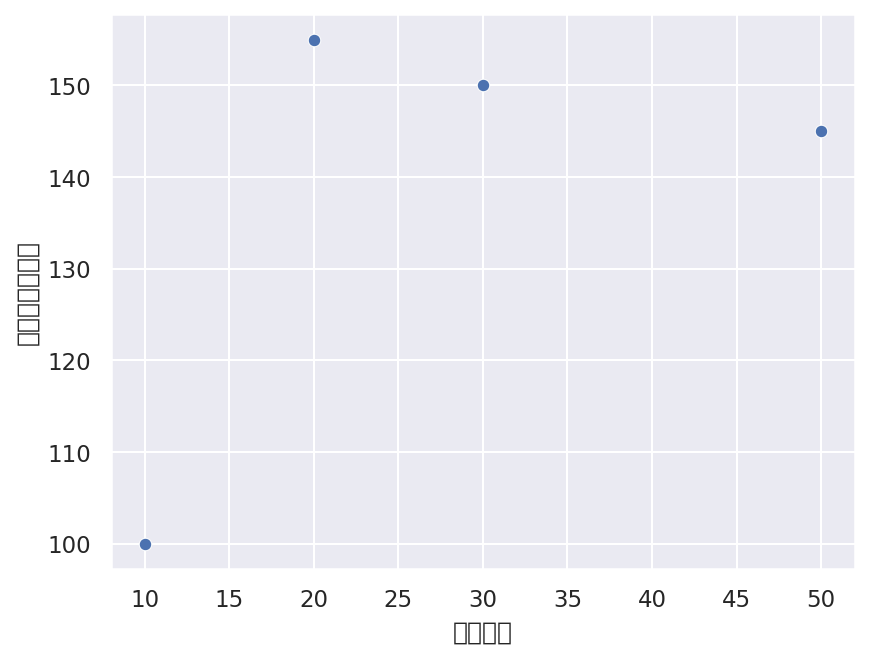

In [12]:
# However, when we set the figure via seaborn, the Thai font is missing again

# Figure setting
sns.set(rc={'figure.dpi':150})    # This line causes the problem with Thai font

# Plot
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])

<Axes: xlabel='อายุ', ylabel='ส่วนสูง'>

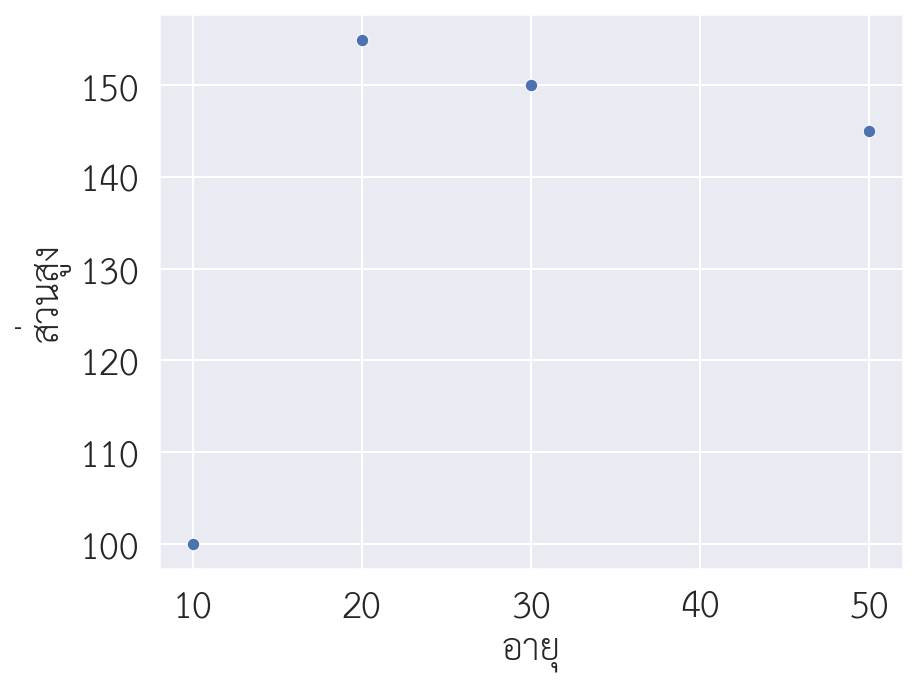

In [13]:
# When setting parameters via seaborn, make sure to include parameters about Thai font

# Parameters to be set
params = {'figure.dpi':150,
          'font.family':font_familyname,
          'legend.fontsize':'x-large',
          'axes.labelsize':'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

# Figure setting
sns.set(rc=params)

# Plot
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])